CS249 -- Spring 2017 -- D.S. Parker &copy; 2017

# Normal Distributions, Supervised Learning in R, LDA, and QDA

We create a random dataset with two classes:  red and blue.

In [121]:
# create random red instances (X-values with classification y=+1)

N.red = 300
Center.red = c(2,4)
x1.red = rnorm( N.red, mean=Center.red[1], sd=1 )
x2.red = rnorm( N.red, mean=Center.red[2], sd=1 )

X.red  = data.frame( x1 = x1.red, x2 = x2.red )
y.red  = rep( +1, N.red )

avg.X.red = apply(X.red, 2, mean)   #  centroid  (2D average)  of the red points

summary(X.red)
summary(y.red)

       x1                 x2       
 Min.   :-0.02921   Min.   :1.523  
 1st Qu.: 1.39806   1st Qu.:3.316  
 Median : 2.12229   Median :3.928  
 Mean   : 2.11597   Mean   :3.984  
 3rd Qu.: 2.66569   3rd Qu.:4.665  
 Max.   : 4.67403   Max.   :6.870  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

In [87]:
# create random blue instances (X-values with classification y=-1)

N.blue = 500
Center.blue = c(6,3)
x1.blue = rnorm( N.blue, mean=Center.blue[1], sd=1 )
x2.blue = rnorm( N.blue, mean=Center.blue[2], sd=1 )

X.blue = data.frame( x1 = x1.blue, x2 = x2.blue )
y.blue = rep( -1, N.blue )

avg.X.blue = apply(X.blue, 2, mean)   #  centroid  (2D average)  of the blue points

In [88]:
summary(X.blue)
summary(y.blue)

       x1              x2        
 Min.   :3.093   Min.   :-1.094  
 1st Qu.:5.259   1st Qu.: 2.290  
 Median :5.956   Median : 3.029  
 Mean   :5.920   Mean   : 2.998  
 3rd Qu.:6.591   3rd Qu.: 3.665  
 Max.   :8.784   Max.   : 5.798  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     -1      -1      -1      -1      -1      -1 

In [89]:
# construct a dataset with all points, red and blue

N = N.red + N.blue
X = as.matrix( rbind( X.red, X.blue ) )
y = c( y.red, y.blue )

avg.X = apply( X, 2, mean )

In [90]:
summary(X)
summary(y)

       x1               x2        
 Min.   :-1.176   Min.   :-1.094  
 1st Qu.: 2.459   1st Qu.: 2.532  
 Median : 5.106   Median : 3.400  
 Mean   : 4.443   Mean   : 3.358  
 3rd Qu.: 6.188   3rd Qu.: 4.079  
 Max.   : 8.784   Max.   : 7.321  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -1.00   -1.00   -1.00   -0.25    1.00    1.00 

In [91]:
options( repr.plot.width=5, repr.plot.height=5 )


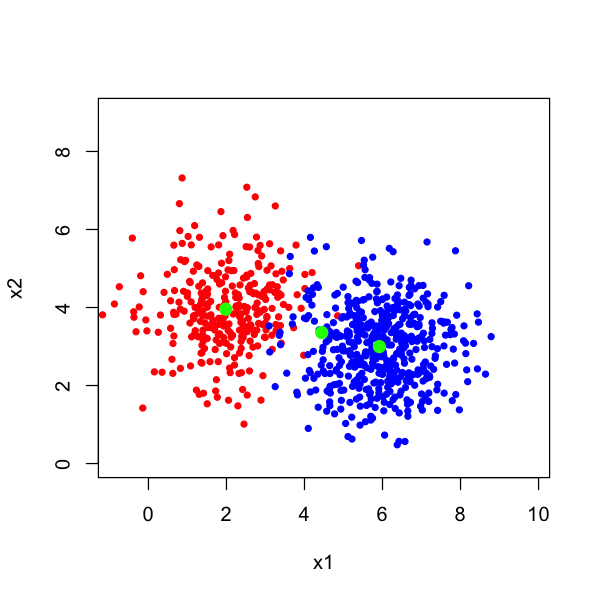

In [92]:
# plot the data

xmax = 9

plot( X.red, col="red", pch=20, xlim=c(0,xmax), ylim=c(0,xmax), asp=1 )

points( X.blue, col="blue", pch=20 )

# also plot the averages for each part of the data (red, blue, and all)

points( rbind( avg.X.red, avg.X.blue, avg.X ), pch=20, cex=2, col="green" )


# Simple Linear Classifier

In [93]:
Dataset = data.frame( x1 = c( x1.red, x1.blue ),
                      x2 = c( x2.red, x2.blue ),
                       y = c( y.red, y.blue ) )

summary(Dataset)

       x1               x2               y        
 Min.   :-1.176   Min.   :-1.094   Min.   :-1.00  
 1st Qu.: 2.459   1st Qu.: 2.532   1st Qu.:-1.00  
 Median : 5.106   Median : 3.400   Median :-1.00  
 Mean   : 4.443   Mean   : 3.358   Mean   :-0.25  
 3rd Qu.: 6.188   3rd Qu.: 4.079   3rd Qu.: 1.00  
 Max.   : 8.784   Max.   : 7.321   Max.   : 1.00  

## Create a linear classifier that uses the vector w to define a "discriminant": a boundary between two classes.

In this case w defines a "direction" vector between the two classes, and the discriminant is orthogonal to it.
We also allow a constant c to shift the discriminant back and forth between the classes

In [94]:
wc.Simple = solve(t(X) %*% X) %*% t(X) %*% y

#  alternatively:   wc.Simple = lsfit(X, y)$coefficients
#  alternatively:   wc.Simple = lm(y ~ X)$coefficients

c.Simple = wc.Simple[1]
w.Simple = wc.Simple[2:3]

In [95]:
wc.Simple

x1,-0.2915315
x2,0.2959769


In [96]:
classifier = function(x, w, c) { 2 * ((x %*% w + c) > 0) - 1 }
                             # i.e., ((x * w + c) > 0) ? +1 : -1

In [97]:
## See how well are simple linear discriminant works:

cat("All misclassified instances with the simple Linear discriminant:\n\n")
which( classifier(X, w.Simple, c.Simple) != y )

All misclassified instances with the simple Linear discriminant:



integer(0)

# Get functions for LDA, QDA, RDA ...

In [98]:
#  LDA and QDA are implemented in the MASS package

if (!(is.element("MASS", installed.packages())))  install.packages("MASS")

require(MASS)

# Simple Linear Discriminant Analysis  (LDA)

In [99]:
LDA.model = lda(y ~ ., data=Dataset )

LDA.model

Call:
lda(y ~ ., data = Dataset)

Prior probabilities of groups:
   -1     1 
0.625 0.375 

Group means:
         x1       x2
-1 5.919524 2.998378
1  1.982823 3.957247

Coefficients of linear discriminants:
          LD1
x1 -0.9494837
x2  0.2575883

In [100]:
LDA.model$means 
#  The means (centers) of the two LDA normal densities
#  should be approximately:
#    (2,4) for class +1
#    (6,3) for class -1

,x1,x2
-1,5.919524,2.998378
1,1.982823,3.957247


In [101]:
linear.discriminant = LDA.model$scaling  #  linear coefficients
linear.discriminant

,LD1
x1,-0.9494837
x2,0.2575883


In [102]:
LDAclassification = function(Model,X)  {
   predict(Model, as.data.frame(X))$class
}

# find all points whose classifications didn't match

cat("All misclassified instances with the LDA discriminant:\n\n")
which( LDAclassification(LDA.model, X) != y )

All misclassified instances with the LDA discriminant:



[1]   3  17 232 301 382 464 469 475 573 588 648 649 650 693 749

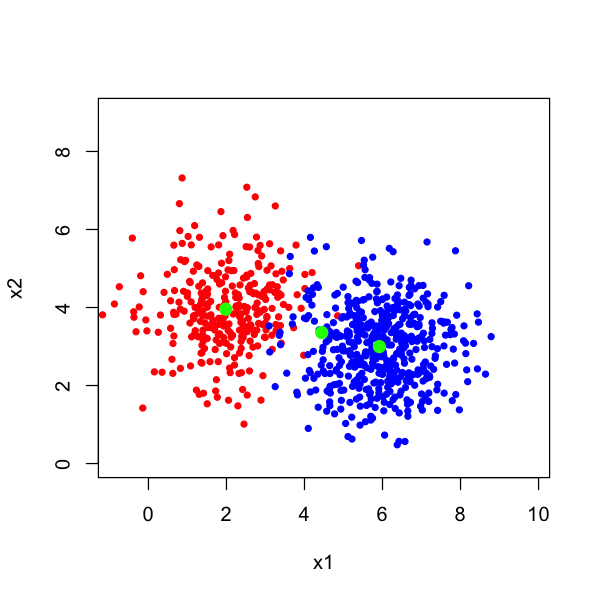

In [103]:
xmax = 9

plot( X.red, col="red", pch=20, xlim=c(0,xmax), ylim=c(0,xmax), asp=1 )

points( X.blue, col="blue", pch=20 )


points( rbind( avg.X.red, avg.X.blue, avg.X ), pch=20, cex=2, col="green" )

curve( (-(w.Simple[1]*x + c.Simple)/w.Simple[2]), col="purple", add=TRUE)  #  plot the discriminant

# Example of how to do Supervised Learning in R

## LDA and QDA on the Iris dataset

In [104]:
n = nrow(iris)

training.sample.size = 75

iris.ids = (1:n)
training.set = sample( iris.ids, training.sample.size ) # Generate a random sample
testing.set  = iris.ids[-training.set]       # The set complement of training.set

In [105]:
training.set

[1]  25   5  89  14  82  79  90  41   2  87  28  10  81  26  94 136  63 142   1
[20]  44   3  21 113  77  20  51  84 118  30 132 141  27 127  34  40  36 114  83
[39]   7  31  91  35  96  52  54 104  32  93  97  23  43 102 148  37  98  61 128
[58]  33  49  57 138   8  65 105 147 133 149 100 103 106 122 125 134  46  56

In [106]:
testing.set

[1]   4   6   9  11  12  13  15  16  17  18  19  22  24  29  38  39  42  45  47
[20]  48  50  53  55  58  59  60  62  64  66  67  68  69  70  71  72  73  74  75
[39]  76  78  80  85  86  88  92  95  99 101 107 108 109 110 111 112 115 116 117
[58] 119 120 121 123 124 126 129 130 131 135 137 139 140 143 144 145 146 150

In [107]:
table(iris$Species)                  # Tabulate the number of each species


    setosa versicolor  virginica 
        50         50         50 

In [108]:
table(iris$Species[training.set])    # Tabulate species for the training set


    setosa versicolor  virginica 
        29         24         22 

In [109]:
table(iris$Species[testing.set])     # Tabulate species for the testing set


    setosa versicolor  virginica 
        21         26         28 

In [110]:
ldaModel = lda( Species ~ ., data = iris, subset = training.set )
ldaModel

Call:
lda(Species ~ ., data = iris, subset = training.set)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3866667  0.3200000  0.2933333 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa         4.972414    3.393103     1.448276   0.2310345
versicolor     5.854167    2.729167     4.191667   1.2833333
virginica      6.609091    3.018182     5.522727   2.0363636

Coefficients of linear discriminants:
                    LD1         LD2
Sepal.Length  0.9288816  0.04573504
Sepal.Width   1.7621444  2.28077706
Petal.Length -2.3752037 -1.70007117
Petal.Width  -3.5781124  4.56805447

Proportion of trace:
   LD1    LD2 
0.9865 0.0135 

In [111]:
lda.predictions = predict( ldaModel, iris[testing.set,] )

In [112]:
lda.incorrect.prediction  =  (lda.predictions$class != iris$Species[testing.set])

incorrect.lda.ids =  testing.set[ lda.incorrect.prediction ]

iris[ incorrect.lda.ids , ]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
71,5.9,3.2,4.8,1.8,versicolor


In [113]:
lda.confusion.matrix = table( iris$Species[testing.set], lda.predictions$class )
lda.confusion.matrix

lda.accuracy = (training.sample.size - length(incorrect.lda.ids)) / training.sample.size
lda.accuracy

            
             setosa versicolor virginica
  setosa         21          0         0
  versicolor      0         25         1
  virginica       0          0        28

[1] 0.9866667

In [114]:
qdaModel = qda( Species ~ ., data = iris, subset = training.set )
qdaModel

qda.predictions = predict( qdaModel, iris[ testing.set ,] )

Call:
qda(Species ~ ., data = iris, subset = training.set)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3866667  0.3200000  0.2933333 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa         4.972414    3.393103     1.448276   0.2310345
versicolor     5.854167    2.729167     4.191667   1.2833333
virginica      6.609091    3.018182     5.522727   2.0363636

In [115]:
qda.incorrect.prediction  =  (qda.predictions$class != iris$Species[testing.set])

incorrect.qda.ids =  testing.set[ qda.incorrect.prediction ]

iris[ incorrect.qda.ids , ]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
69,6.2,2.2,4.5,1.5,versicolor
71,5.9,3.2,4.8,1.8,versicolor


In [116]:
qda.confusion.matrix = table( iris$Species[testing.set], qda.predictions$class )
qda.confusion.matrix

            
             setosa versicolor virginica
  setosa         21          0         0
  versicolor      0         24         2
  virginica       0          0        28

In [117]:
qda.accuracy = (training.sample.size - length(incorrect.qda.ids)) / training.sample.size
qda.accuracy

[1] 0.9733333

# PCA vs. LDA

In [119]:
PCA_results = prcomp(iris[,1:4], center = TRUE, scale = TRUE) 

LDA_model = lda(Species ~ ., data = iris )

projected_LDA = predict(object = LDA_model, newdata = iris)

dataset = data.frame(Species = iris$Species, PCA = PCA_results$x, LDA = projected_LDA$x)

In [ ]:
if (!(is.element("ggplot2", installed.packages())))  install.packages("ggplot2")

library(ggplot2)

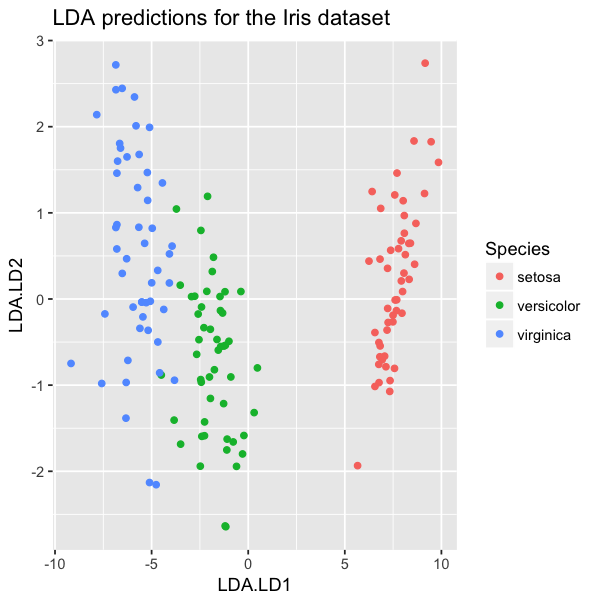

In [126]:
ggplot(dataset) + geom_point(aes(LDA.LD1, LDA.LD2, color = Species), size = 1.5) + 
    ggtitle("LDA predictions for the Iris dataset")

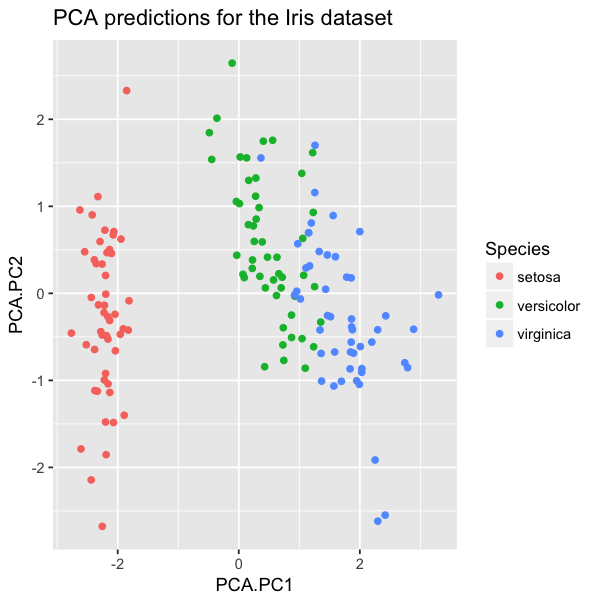

In [125]:
ggplot(dataset) + geom_point(aes(PCA.PC1, PCA.PC2, color = Species), size = 1.5) + 
    ggtitle("PCA predictions for the Iris dataset")